# Problem 1

## Nonlinear Program Formulation

Given:
Cost function: \$ \prod_{i=1}^{n} (c_i x_i^{a_i})\$  \
Constraints: \$ \sum_{i=1}^{n} r_{ij} x_i \leq R_j\$ for all \$ j = 1, \ldots, m \$  \
Minimum demand: \$ x_i \geq d_i\$ for all \$ i \$

We need to minimize the cost function while satisfying the constraints.

### Transforming the Problem Using Logarithm

1. Objective function:
   \$
   \log \left( \prod_{i=1}^{n} (c_i x_i^{a_i}) \right) = \sum_{i=1}^{n} \log(c_i x_i^{a_i}) = \sum_{i=1}^{n} (\log(c_i) + a_i \log(x_i))
   \$
   Since \$\log(c_i)\$ are constants, we need to minimize:
   \$
   \sum_{i=1}^{n} (a_i \log(x_i))
   \$

2. Constraints remain linear:
   \$
   \sum_{i=1}^{n} r_{ij} x_i \leq R_j \quad \text{for all } j
   \$
   \$
   x_i \geq d_i \quad \text{for all } i
   \$

In [1]:
using JuMP, Ipopt

model = Model(Ipopt.Optimizer)

# number of products and stages
n = 3
m = 3

# cost coefficients and exponents
c = [1, 2, 3]
a = [0.5, 0.4, 0.3]

# minimum demand levels
d = [100, 150, 200]

# resource constraints
R = [500, 600, 700]
r = [
    [0.1, 0.2, 0.3],
    [0.2, 0.1, 0.4],
    [0.3, 0.3, 0.2]
]

# define variables
@variable(model, x[i=1:n] >= d[i])

# define the objective function
@NLobjective(model, Min, sum(a[i] * log(x[i]) for i in 1:n))

# define the constraints
for j in 1:m
    @constraint(model, sum(r[j][i] * x[i] for i in 1:n) <= R[j])
end

# optimize the model
optimize!(model)

# get the optimal solution
println("Optimal production levels for each product: ", value.(x))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        9
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

# Problem 2

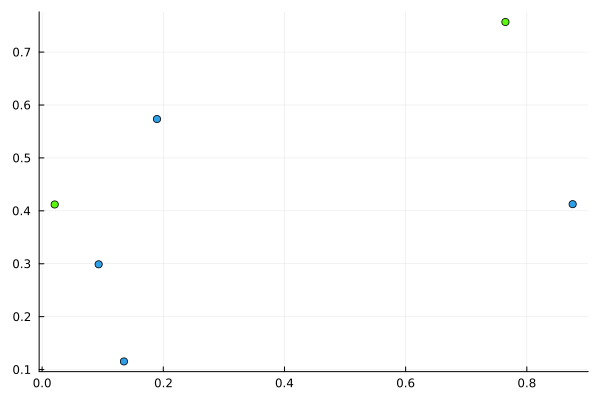

In [9]:
using Random, Plots
using JuMP

# Number of points and colors
n = 6  # number of points (small value to start)
k = 2  # number of colors (circles) to use (small value to start)

# randomly generate n points with (x,y) coords between 0 and 1
points = [(rand(),rand()) for i in 1:n]

# randomly assigned points to colors
point_color = [[] for i in 1:k]
pc = rand(1:k,n) 

for i in 1:n
    for j in 1:k
        if pc[i] == j
            point_color[j] = vcat(point_color[j],points[i])
        end
    end
end

# randomly generate color hex code
color = ["" for i in 1:k]
for i in 1:k
    color[i] = randstring(['0':'9'; 'a':'f'])
end

fig = scatter()
#for each of the n points, plot it on a scatterplot
for j in 1:k
    for i in 1:length(point_color[j])
        colstring = string("#",color[j])
        scatter!([point_color[j][i][1]],[point_color[j][i][2]],
            color=colstring,legend=false)  
    end
end

# show the figure
fig

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        6
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        6
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.9999980e-02 1.15e+00 1.02e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

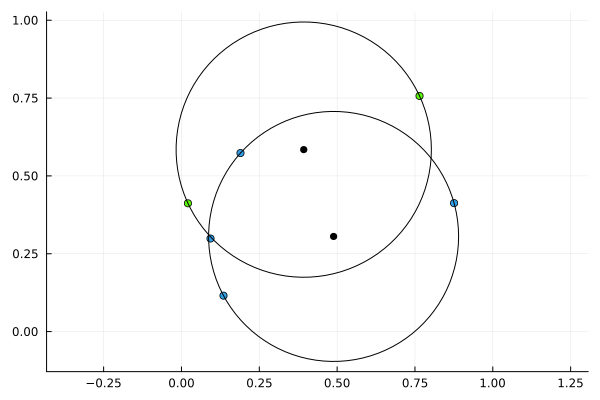

In [10]:
# need to use Ipopt because I wasn't able to install Gurobi after getting the academic license

using Ipopt

# Define the model
model = Model(Ipopt.Optimizer)

# Variables for circle centers and radii squared
@variable(model, x[1:k, 1:2])
@variable(model, r[1:k] >= 0)

# Constraints to ensure all points are enclosed in at least one circle of the same color
for j in 1:k
    for p in point_color[j]
        @constraint(model, (x[j, 1] - p[1])^2 + (x[j, 2] - p[2])^2 <= r[j])
    end
end

# Objective to minimize the sum of the radii squared
@objective(model, Min, sum(r))

# Solve the model
optimize!(model)

# Check the solution status
println("Solution status: ", termination_status(model))

# Extract the optimized circle centers and radii
optimal_centers = value.(x)
optimal_radii = sqrt.(value.(r))

# Plotting the optimized circles
fig = plot(aspect_ratio=:equal)

# Replot n points
for j in 1:k
    for i in 1:length(point_color[j])
        colstring = "#" * color[j]
        scatter!([point_color[j][i][1]], [point_color[j][i][2]],
                 color=colstring, legend=false)
    end
end

# Parameter to traverse the perimeter of the circle
t = collect(range(0, stop=2*pi, length=100))

# Plot each circle
for j in 1:k
    plot!([optimal_centers[j, 1]], [optimal_centers[j, 2]], marker=:circle, color=:black, legend=false)
    plot!([optimal_centers[j, 1] .+ optimal_radii[j] * cos.(t)], 
          [optimal_centers[j, 2] .+ optimal_radii[j] * sin.(t)], 
          color=:black, legend=false)
end

# Display the optimized figure
display(fig)

# Problem 3

## Problem Formulation

### Variables:
- Let \$ x_1 \$ be the number of Golden Retriever puppies adopted.
- Let \$ x_2 \$ be the number of Shiba Inu puppies adopted.
- Let \$ x_3 \$ be the number of Great Dane puppies adopted.
- Let \$ x_4 \$ be the number of Pomeranian puppies adopted.
- Let \$ x_5 \$ be the number of Water Spaniel puppies adopted.
- Let \$ x_6 \$ be the number of Husky puppies adopted.

### Objective:
- Maximize total happiness: \$ 8x_1 + 9x_2 + 4x_3 + 5x_4 + 10x_5 + 3x_6 \$

### Constraints:
1. \$ 5 \leq x_1 \leq 7 \$
2. \$ 2 \leq x_2 \leq 10 \$
3. \$ 3 \leq x_3 \leq 5 \$
4. \$ 6 \leq x_4 \leq 13 \$
5. \$ 3 \leq x_5 \leq 15 \$
6. \$ 7 \leq x_6 \leq 10 \$
7. \$ x_6 \leq x_1 + x_5 + x_2 \$ (Husky constraint)
8. \$ x_4 \geq 6 \rightarrow x_3 \geq 3 \$ (Pomeranian and Great Dane constraint)
9. \$ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 = 35 \$ (Total number of puppies)

In [11]:
using JuMP, Cbc

# Define the model
model = Model(Cbc.Optimizer)

# Variables for the number of puppies adopted for each breed
@variable(model, 5 <= x1 <= 7, Int)  # Golden Retriever
@variable(model, 2 <= x2 <= 10, Int)  # Shiba Inu
@variable(model, 3 <= x3 <= 5, Int)  # Great Dane
@variable(model, 6 <= x4 <= 13, Int)  # Pomeranian
@variable(model, 3 <= x5 <= 15, Int)  # Water Spaniel
@variable(model, 7 <= x6 <= 10, Int)  # Husky
@variable(model, b, Bin)  # Binary variable to indicate if Pomeranians are adopted

# Objective function to maximize total happiness
@objective(model, Max, 8*x1 + 9*x2 + 4*x3 + 5*x4 + 10*x5 + 3*x6)

# Constraints
@constraint(model, x6 <= x1 + x2 + x5)
@constraint(model, x4 >= 6 - 1000 * (1 - b))  # If b == 1, then x4 >= 6; otherwise, no constraint on x4
@constraint(model, x3 >= 3 * b)  # If b == 1, then x3 >= 3; otherwise, no constraint on x3
@constraint(model, x1 + x2 + x3 + x4 + x5 + x6 == 35)

# Optimize the model
optimize!(model)

# Check the solution status
println("Solution status: ", termination_status(model))

# Get the optimal solution
optimal_puppies = [value(x1), value(x2), value(x3), value(x4), value(x5), value(x6)]
println("Optimal number of puppies adopted for each breed: ", optimal_puppies)
println("Maximum happiness: ", objective_value(model))

Solution status: OPTIMAL
Optimal number of puppies adopted for each breed: [5.0, 2.0, 3.0000000000000004, 6.0, 12.0, 6.999999999999999]
Maximum happiness: 241.0
Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Oct 26 2022 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 241 - 0.00 seconds
Cgl0004I processed model has 1 rows, 6 columns (6 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of -241 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -241, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from -241 to -241
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rou